In [32]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import random

In [33]:
tv = "Cleaning_up_data/clean_tv.csv"
tv_df = pd.read_csv(tv)
del tv_df['index']
tv_df

,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+
0,Breaking Bad,2008,9.5,1,0,0,0
1,Stranger Things,2016,8.8,1,0,0,0
2,Money Heist,2017,8.4,1,0,0,0
3,Sherlock,2010,9.1,1,0,0,0
4,Better Call Saul,2015,8.7,1,0,0,0
...,...,...,...,...,...,...,...
4445,Billy Dilley's Super-Duper Subterranean Summer,2017,4.6,0,0,0,1
4446,Rocky Mountain Animal Rescue,2018,7.8,0,0,0,1
4447,Prairie Dog Manor,2019,8.6,0,0,0,1
4448,Disney Junior Music Nursery Rhymes,2017,6.6,0,0,0,1


<function matplotlib.pyplot.show(*args, **kw)>

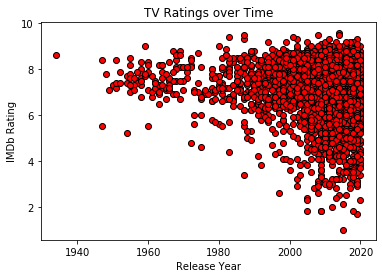

In [34]:
year = tv_df['Year']
rating = tv_df['IMDb']
plt.scatter(year, rating, facecolor = 'red', edgecolor = 'black')
plt.ylabel('IMDb Rating')
plt.xlabel('Release Year')
plt.title('TV Ratings over Time')

plt.savefig("PNG/tv_vs_time.png")
plt.show

In [35]:
sample_df = tv_df.sample(n=1000)

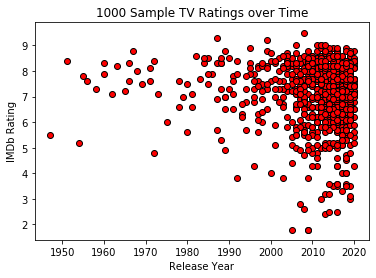

In [36]:
year = sample_df['Year']
rating = sample_df['IMDb']
plt.scatter(year, rating, facecolor = 'red', edgecolor = 'black')
plt.ylabel('IMDb Rating')
plt.xlabel('Release Year')
plt.title('1000 Sample TV Ratings over Time')

plt.savefig("PNG/sampletv_vs_time.png")

plt.show()

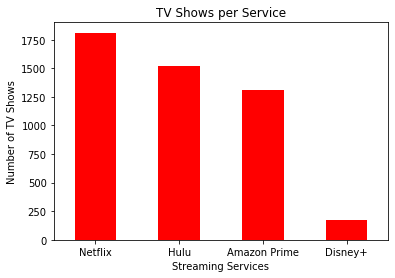

In [37]:
netflix_df = tv_df.loc[tv_df['Netflix'] == 1]
netflix = (len(netflix_df))

hulu_df = tv_df.loc[tv_df['Hulu'] == 1]
hulu = (len(hulu_df))

prime_df = tv_df.loc[tv_df['Prime Video'] == 1]
prime = (len(prime_df))

disney_df = tv_df.loc[tv_df['Disney+'] == 1]
disney = (len(disney_df))

count_df = pd.DataFrame({'Streaming Services': ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+'],
                         'Count': [netflix, hulu, prime, disney]}
                       ).set_index('Streaming Services')
count_df.plot(kind='bar', color = 'red')
plt.ylabel("Number of TV Shows")
plt.title("TV Shows per Service")
plt.xticks(rotation=0)
plt.legend().remove()

plt.savefig("PNG/tv_per_service.png")

plt. show()

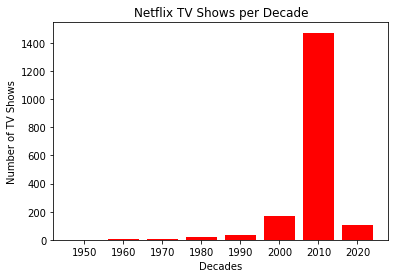

In [38]:
year_bin = [0, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

netflix_year_df = netflix_df[['Title', 'Year']].reset_index(inplace=False)
# netflix_year_df['Year'].value_counts()
netflix_year_df['Decade'] = pd.cut(netflix_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
# netflix_year_df
netflix_bar_df = netflix_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(netflix_bar_df['Decade'],netflix_bar_df['Year'], color = 'red')
plt.xlabel("Decades")
plt.ylabel("Number of TV Shows")
plt.title('Netflix TV Shows per Decade')

plt.savefig('PNG/netflix_tv_decades.png')
plt.show()

In [39]:
netflix_df['Decade'] = pd.cut(netflix_df['Year'], year_bin, labels=year_names, include_lowest=True)

summary_netflix = netflix_df.groupby(['Decade']).agg({'IMDb': ['mean', 'median', 'count']})
summary_netflix = summary_netflix.dropna(how='any')
summary_netflix

C:\Users\oberm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IMDb             
            mean median count
Decade                       
1950    9.000000   9.00     1
1960    8.060000   8.30     5
1970    8.466667   8.50     3
1980    7.450000   7.75    18
1990    7.411429   7.90    35
2000    7.366864   7.60   169
2010    7.149253   7.30  1472
2020    6.812963   7.10   108

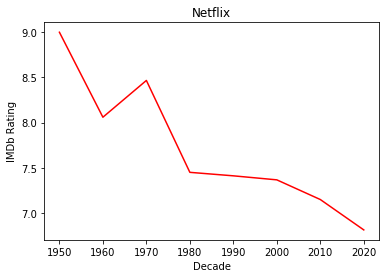

In [40]:
tick_locations = [0, 1, 2, 3, 4, 5, 6, 7]
netflix_line = netflix_df.groupby(['Decade']).agg({'IMDb': ['mean']})
netflix_line = netflix_line.dropna(how='any')
netflix_line.plot(color = 'red')
plt.xticks(tick_locations, year_names)
plt.ylabel('IMDb Rating')
plt.legend().remove()
plt.title('Netflix')
plt.savefig('PNG/netflix_ratings_time.png')
plt.show()


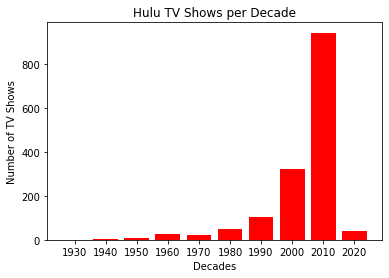

In [41]:
year_bin = [0, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

hulu_year_df = hulu_df[['Title', 'Year']].reset_index(inplace=False)
# hulu_year_df['Year'].value_counts()
hulu_year_df['Decade'] = pd.cut(hulu_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
# hulu_year_df
hulu_bar_df = hulu_year_df.groupby('Decade').count().reset_index(inplace=False)

plt.bar(hulu_bar_df['Decade'],hulu_bar_df['Year'], color = 'red')

plt.xlabel("Decades")
plt.ylabel("Number of TV Shows")
plt.title('Hulu TV Shows per Decade')

plt.savefig('PNG/hulu_tv_decades.png')
plt.show()

In [42]:
hulu_df['Decade'] = pd.cut(hulu_df['Year'], year_bin, labels=year_names, include_lowest=True)

summary_hulu = hulu_df.groupby(['Decade']).agg({'IMDb': ['mean', 'median', 'count']})
summary_hulu = summary_hulu.dropna(how='any')
summary_hulu

C:\Users\oberm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IMDb             
            mean median count
Decade                       
1930    8.600000   8.60     1
1940    6.950000   6.95     2
1950    7.950000   8.00     8
1960    7.284615   7.20    26
1970    7.178261   7.10    23
1980    7.308333   7.30    48
1990    7.300000   7.50   102
2000    7.111146   7.50   323
2010    7.000317   7.20   945
2020    6.756410   7.00    39

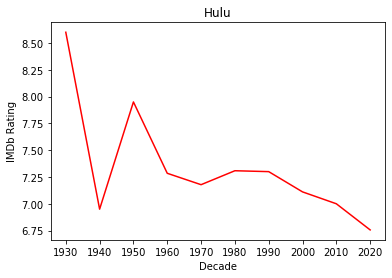

In [43]:
tick_locations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
hulu_line = hulu_df.groupby(['Decade']).agg({'IMDb': ['mean']})
hulu_line = hulu_line.dropna(how='any')
hulu_line.plot(color='red')
plt.xticks(tick_locations, year_names)
plt.ylabel('IMDb Rating')
plt.legend().remove()
plt.title('Hulu')
plt.savefig('PNG/hulu_tv_decades.png')
plt.show()

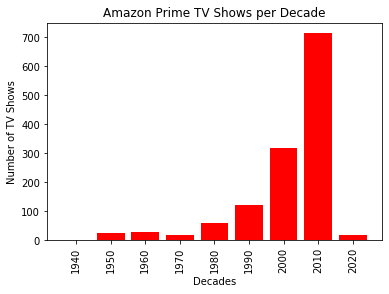

In [44]:
year_bin = [0, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

prime_year_df = prime_df[['Title', 'Year']].reset_index(inplace=False)
#prime_year_df['Year'].value_counts()
prime_year_df['Decade'] = pd.cut(prime_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
# prime_year_df
prime_bar_df = prime_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(prime_bar_df['Decade'],prime_bar_df['Year'], color = 'red')
plt.xticks(rotation=90)

plt.xlabel("Decades")
plt.ylabel("Number of TV Shows")
plt.title('Amazon Prime TV Shows per Decade')

plt.savefig('PNG/prime_tv_decades.png')
plt.show()

In [45]:
prime_df["Decade"] = pd.cut(prime_df['Year'], year_bin, labels=year_names, include_lowest=True)

summary_prime = prime_df.groupby(['Decade']).agg({'IMDb': ['mean', 'median', 'count']})
summary_prime = summary_prime.dropna(how='any')
summary_prime

C:\Users\oberm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IMDb             
            mean median count
Decade                       
1940    7.450000   7.45     2
1950    7.440741   7.50    27
1960    7.717857   7.65    28
1970    7.010526   7.00    19
1980    7.468852   7.50    61
1990    7.309016   7.40   122
2000    7.058991   7.30   317
2010    7.160364   7.30   714
2020    7.141176   7.40    17

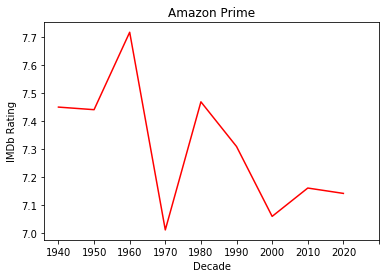

In [46]:
tick_locations = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
prime_line = prime_df.groupby(['Decade']).agg({'IMDb': ['mean']})
prime_line = prime_line.dropna(how='any')
prime_line.plot(color='red')
plt.xticks(tick_locations, year_names)
plt.ylabel('IMDb Rating')
plt.legend().remove()
plt.title('Amazon Prime')
plt.savefig('PNG/prime_tv_decades.png')
plt.show()

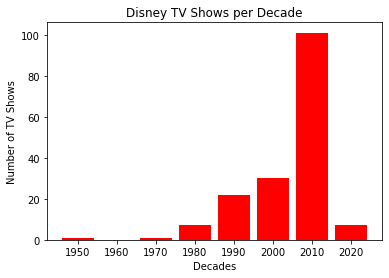

In [47]:
year_bin = [0, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

disney_year_df = disney_df[['Title', 'Year']].reset_index(inplace=False)
#disney_year_df['Year'].value_counts()
disney_year_df['Decade'] = pd.cut(disney_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
# disney_year_df
disney_bar_df = disney_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(disney_bar_df['Decade'],disney_bar_df['Year'], color = 'red')

plt.xlabel("Decades")
plt.ylabel("Number of TV Shows")
plt.title('Disney TV Shows per Decade')

plt.savefig('PNG/disney_tv_decades.png')
plt.show()

In [48]:
disney_df["Decade"] = pd.cut(disney_df['Year'], year_bin, labels=year_names, include_lowest=True)

summary_disney = disney_df.groupby(['Decade']).agg({'IMDb': ['mean', 'median', 'count']})
summary_disney = summary_disney.dropna(how='any')
summary_disney

C:\Users\oberm\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


IMDb             
            mean median count
Decade                       
1950    8.200000    8.2     1
1970    5.700000    5.7     1
1980    7.557143    7.6     7
1990    7.222727    7.1    22
2000    6.603333    6.5    30
2010    6.891089    7.0   101
2020    7.185714    7.2     7

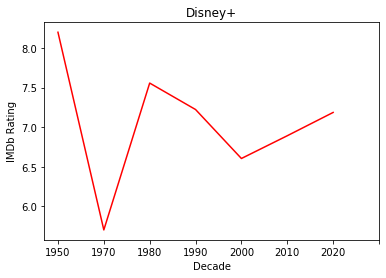

In [49]:
tick_locations = [0, 1, 2, 3, 4, 5, 6, 7]
year_names = ['1950', '1970', '1980', '1990', '2000', '2010', '2020']
disney_line = disney_df.groupby(['Decade']).agg({'IMDb': ['mean']})
disney_line = disney_line.dropna(how='any')
disney_line.plot(color='red')
plt.xticks(tick_locations, year_names)
plt.ylabel('IMDb Rating')
plt.legend().remove()
plt.title('Disney+')
plt.savefig('PNG/disney_tv_decades.png')
plt.show()

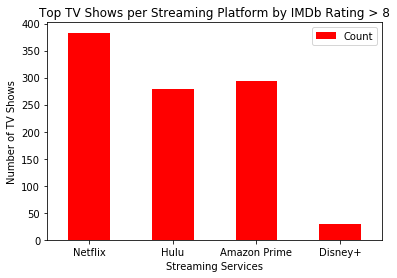

In [50]:
top_netflix = netflix_df.loc[netflix_df['IMDb']>8]
tnetflix = (len(top_netflix))

top_hulu = hulu_df.loc[hulu_df['IMDb']>8]
thulu = (len(top_hulu))

top_prime = prime_df.loc[prime_df['IMDb']>8]
tprime = (len(top_prime))

top_disney = disney_df.loc[disney_df['IMDb']>8]
tdisney = (len(top_disney))

count_df = pd.DataFrame({'Streaming Services': ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+'],
                         'Count': [tnetflix, thulu, tprime, tdisney]}
                       ).set_index('Streaming Services')
count_df.plot(kind='bar', color = 'red')

plt.ylabel("Number of TV Shows")
plt.title('Top TV Shows per Streaming Platform by IMDb Rating > 8')

plt.xticks(rotation=0)

plt.savefig('PNG/top_tv_per_service.png')
plt.show()